In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
%matplotlib inline

In [65]:
# 预测时间点个数
forecastnum = 5

In [66]:
data = pd.read_excel('data/arima_data.xls', index_col= u'日期')
data.head()

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


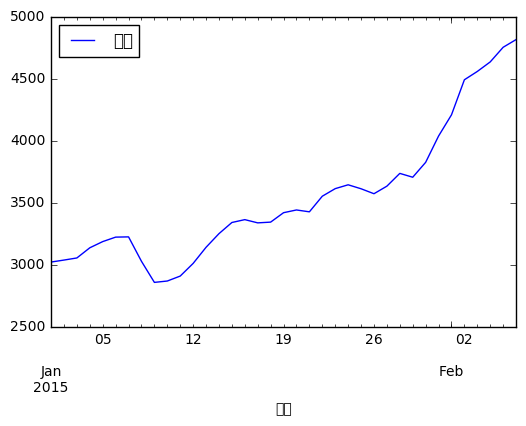

In [67]:
# time series figure
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data.plot()
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


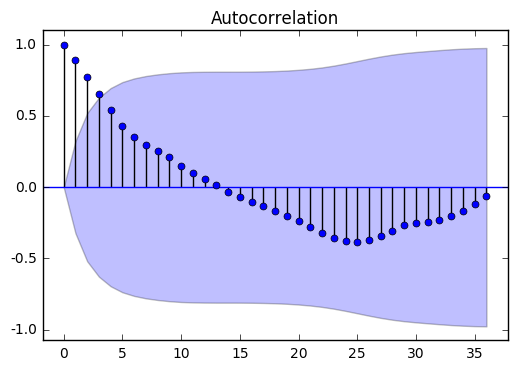

In [68]:
# AR figure
plot_acf(data).show();

In [69]:
# 平稳性检验
print(u'原始序列的ADF检验结果：', ADF(data[u'销量']))

原始序列的ADF检验结果： (1.8137710150945274, 0.99837594215142644, 10, 26, {'1%': -3.7112123008648155, '10%': -2.6300945562130176, '5%': -2.9812468047337282}, 299.46989866024177)


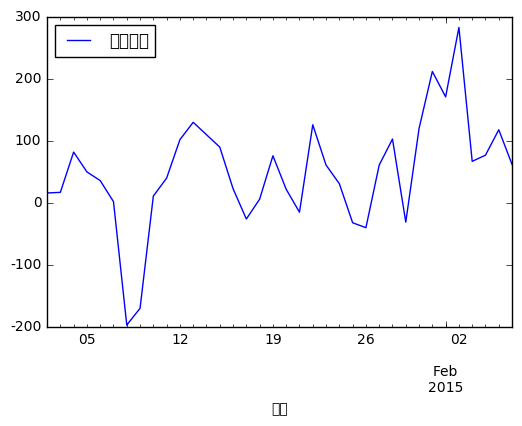

In [70]:
# 差分操作以及差分后的时序图
D_data = data.diff().dropna()
D_data.columns = [u'销量差分']
D_data.plot()
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


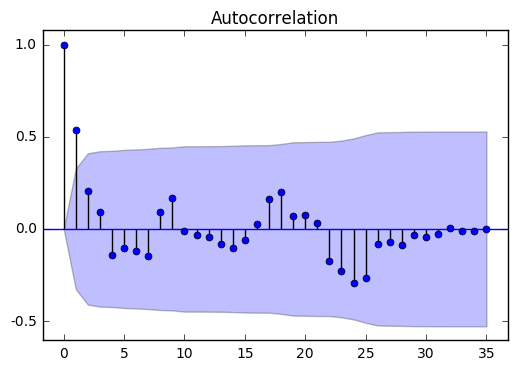

In [71]:
# 差分后的自相关图
plot_acf(D_data).show()

E:\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


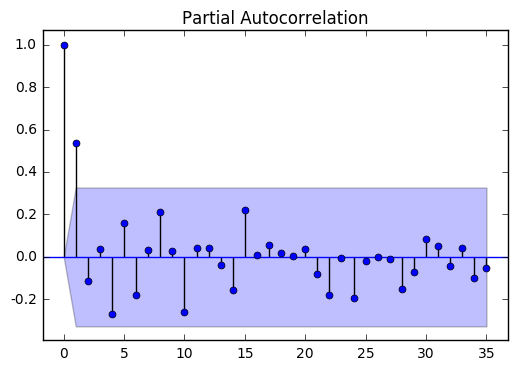

In [72]:
# 差分后的偏自相关图
plot_pacf(D_data).show()

In [73]:
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'销量差分']))

差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '10%': -2.6130173469387756, '5%': -2.9485102040816327}, 287.59090907803341)


In [74]:
# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox

In [75]:
print(u'差分序列的白噪声检验结果：', acorr_ljungbox(D_data, lags=1))

差分序列的白噪声检验结果： (array([ 11.30402222]), array([ 0.00077339]))


In [76]:
from statsmodels.tsa.arima_model import ARIMA

In [77]:
#定阶
pmax = int(len(D_data)/10)
qmax = int(len(D_data)/10)
bic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(D_data, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix)

In [78]:
bic_matrix

,0,1,2,3
0,418.262810,420.442367,414.794192,418.087835
1,421.068758,NaN,NaN,NaN
2,422.476769,NaN,420.028968,NaN
3,425.942544,426.880891,423.574047,NaN


In [89]:
p,q = bic_matrix.stack().idxmin()

In [90]:
print(u'BIC最小的p值和q值为：%s, %s', (p, q))

BIC最小的p值和q值为：%s, %s (0, 2)


In [99]:
data[u'销量'] = data[u'销量']*1.0
model = ARIMA(data, (p, 1, q)).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            Log-Likelihood:      -205.88   
Dependent Variable: D.销量             Scale:               1.0000    
Date:               2017-08-25 16:46 Method:              css-mle   
No. Observations:   36               Sample:              01-02-2015
Df Model:           3                                     02-06-2015
Df Residuals:       33               S.D. of innovations: 73.064    
AIC:                419.7548         HQIC:                421.966   
BIC:                426.0889                                        
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const        50.0029    19.9994    2.5002   0.0176   10.8049   89.2010
ma.L1.D.销量    0.6699     0.1643    4.0770   0.0003    0.3478    0.9919
ma.L2.D.销量   -0.0115     0.1682   -0.0682   0.9460   -0.3411    0.3181
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -1.4565             0.0000           1.4565             0.5000
MA.2           59.8636             0.0000          59.8636             0.0000
====================================================================

"""

In [100]:
model.forecast(forecastnum)

(array([ 4875.47144788,  4925.32925702,  4975.33219632,  5025.33513562,
         5075.33807492]),
 array([  73.06407544,  142.21287555,  186.83378272,  222.68637757,
         253.51840791]),
 array([[ 4732.26849145,  5018.67440431],
        [ 4646.5971428 ,  5204.06137124],
        [ 4609.1447111 ,  5341.51968154],
        [ 4588.87785573,  5461.7924155 ],
        [ 4578.451126  ,  5572.22502383]]))